# Matrix decomposition

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 1b

Setting up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt
import pickle

%matplotlib inline

## Covariance matrix and positive semidefinite matrix

For a dataset $X$ with $N$ examples and $D$ features, we can represent it as a matrix. What is the dimensions of this matrix $X$? The covariance matrix $C$ is the matrix representing the variance and covariance between each pair of features. What is the size of this matrix $C$?

### Solution

The covariance $C$ is given by
$$
C = \frac{1}{n} XX^T.
$$


Generate a data matrix $X$ using ```gen_data``` from Tutorial 1a. Compute the covariance matrix $C$ and its eigenvalue decomposition using ```np.linalg.eigh```.

In [2]:
# Solution

def gen_data(n_samples=100, n_feat=5):
    """Generate data from two Gaussians
    n_samples = number of samples from each Gaussian
    n_feat = dimension of the features
    """
    X1 = np.ones((n_feat, n_samples)) + np.random.randn(n_feat, n_samples)
    X2 = -np.ones((n_feat, n_samples)) + np.random.randn(n_feat, n_samples)
    X = np.hstack([X1,X2])
    return X

toy_data = gen_data()
print(toy_data.shape)

n_feat, n_samples = toy_data.shape
C = np.dot(toy_data, toy_data.T)/n_samples
lamb, U = np.linalg.eigh(C)
print(lamb)

(5, 200)
[ 0.82575865  0.94283903  0.97752131  1.24656192  5.71955277]


Covariance matrices are an example of a class of matrices which are *positive semidefinite*. A matrix $A$ is called symmetric if $A_{ij}=A_{ji}$. Another way to say this is that $A=A^\top$. A matrix $A\in\mathbb{R}^{n\times n}$ is called **positive semidefinite**, if for all vectors $x\in\mathbb{R}^n$,
$$
    x^\top A x \geqslant 0.
$$
Show that the eigenvalues of a positive semidefinite matrix are non-negative.

### Solution

Recall that a symmetric matrix has real eigenvalues [Wikipedia](https://en.wikipedia.org/wiki/Spectral_theorem).

Recall the definition of an eigenvalue $\lambda$ (and an eigenvector $v$):
$$
Av = \lambda v
$$

For a matrix to be positive semidefinite, $x^\top A x \geqslant 0$ for all $x$.
But if $x$ is an eigenvector of $A$, then substituting into the quadratic form
$$
x^\top A x = v^\top A v = v^\top v\lambda.
$$
Since $v^\top v$ is necessarily a positive number, in order for $v^\top A v$ to be greater than or equal to 0, $\lambda$ must be greater than or equal to 0.

## Principal component analysis (PCA)

You will see more about principal component analysis later in the course. For now, we will treat PCA as an exercise in matrix manipulation.

The **Singular Values** of a square matrix $A$ is defined as the square root of the eigenvalues of $A^T A$. Given a matrix $X$, the singular value decomposition (SVD) is given by
$$
X = U S V^T
$$
where $U$ and $V$ are orthogonal matrices containing the left and right singular vectors respectively. And $S$ is a matrix with the singular values along the diagonal.

Using the definition of the covariance matrix $C$:
1. Substitute the singular value decomposition of $X$
2. Simplify the resulting expression. You should have an expression of $C$ in terms of $U$ and $S$.
3. Recall from Tutorial 2, the definition of an eigenvalue decomposition.
4. What is the matrix that contains the eigenvectors corresponding to the $k$ largest eigenvalues of $C$?



Recall that PCA considers the covariance matrix of a data matrix $X$. Using the definition of SVD above, derive expressions for:
1. the eigenvectors
2. the projection of $X$ onto the $k$ largest eigenvalues


### Solution

By substituting the definition of SVD to the covariance matrix,
$$
C = \frac{1}{n} USV^T VS^T U^T
$$
Since $V$ is an orthogonal matrix, $V^T V=\mathbf{I}$. Since $S$ is diagonal, $S^T=S$, and $S*S=S^2$, where $S^2$ is a diagonal matrix with the squared singular values on the diagonal. Therefore
$$
C = \frac{1}{n} US^2 U^T
$$

By comparing the equation above with the eigenvalue decomposition of $C$, we observe that the left singular vectors are eigenvectors.

Let $U_k$ be the matrix containing the eigenvectors corresponding to the $k$ largest eigenvalues. The projection of the data matrix $X$ is given by
$$
Z = U_k^T X = U_k^T USV^T
$$
Note that the matrix $U_k^T U$ essentially selects the first $k$ columns of $SV^T$.

## Implement PCA

Implement the principal component analysis method, using ```numpy.linalg.svd```. Your function should take the data matrix and return two matrices:
1. The projection of the data onto the principal components
2. The actual components (eigenvectors) themselves.

*Hint: do not forget to center the data by removing the mean*

In [3]:
# Solution
def pca(X, n_pc=2):
    """Returns the projection onto the principal components (default=2)"""
    n_samples, n_features = X.shape
    M = np.mean(X, axis=0)
    X -= M
    U, S, V = np.linalg.svd(X)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components

Use the code from Tutorial 1 to generate toy data with 100 samples in 5 dimensions. Recall that the data is from two Gaussians with unit variance, centered at $\mathbf{1}$ and $-\mathbf{1}$ respectively.

Obtain the projection of the toy data to its first two principal components. Plot the results. You should be able to see that the first principal component already gives you the axis of discrimination. Revisit the question of the effect of dimension on two Gaussians with unit variance.

Text(0,0.5,'Second principal component')

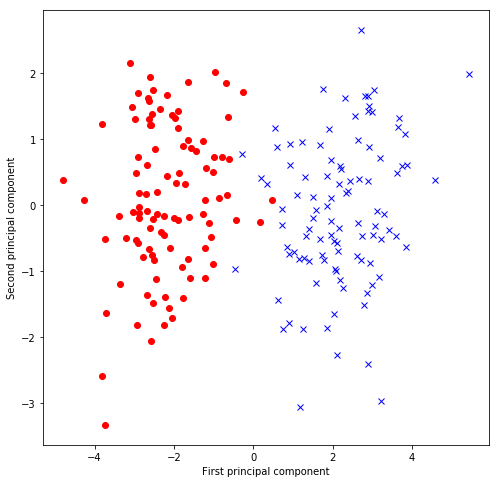

In [4]:
# Solution
Z, P = pca(toy_data.T)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(Z[:100,0], Z[:100,1], 'ro')
ax.plot(Z[100:,0], Z[100:,1], 'bx')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')

## (optional) Effect of normalisation on principal components

The toy dataset is generated from spherical Gaussians. Explore the following effects on PCA:
- Multiply each feature by a different scaling factor.
- Write a new function for generating data from more than 2 Gaussians, placed at different locations.
- Write a new function for generating data that generates Gaussians which are not spherical.

In [5]:
# Solution

## Eigenfaces

The aim of this section of the tutorial is to see that in some cases, the principal components can be human interpretable.

The images below are of Colin Powell, resized to a smaller image, from [LFW](http://vis-www.cs.umass.edu/lfw/). Download the images from [the course website](https://machlearn.gitlab.io/isml2018/tutorials/lfw_colin.pkl).

In [6]:
# Visualising images
def plot_gallery(images, titles, h, w, n_row=2, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



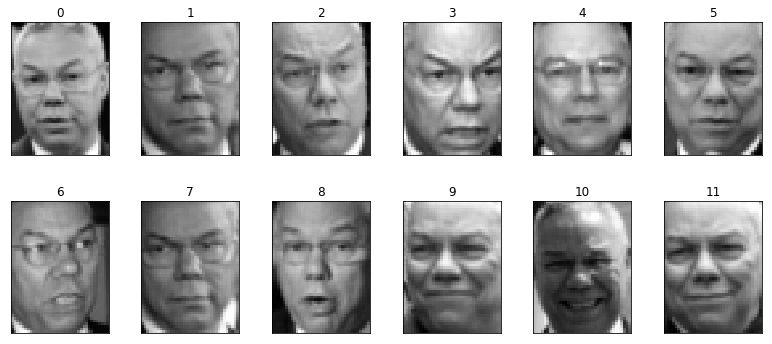

In [7]:
lfw_colin = pickle.load(open('lfw_colin.pkl', 'rb'))

# introspect the images array to find the shapes (for plotting)
n_samples, h, w = lfw_colin['images'].shape
plot_gallery(lfw_colin['images'], range(n_samples), h, w)


Use the ```pca``` function you wrote above to find the first 15 principal components. Visualise them. Discuss what the components potentially capture, for example lighting from the right.

*Hint: Images need to be converted into a vector for PCA, and the results need to be converted back*

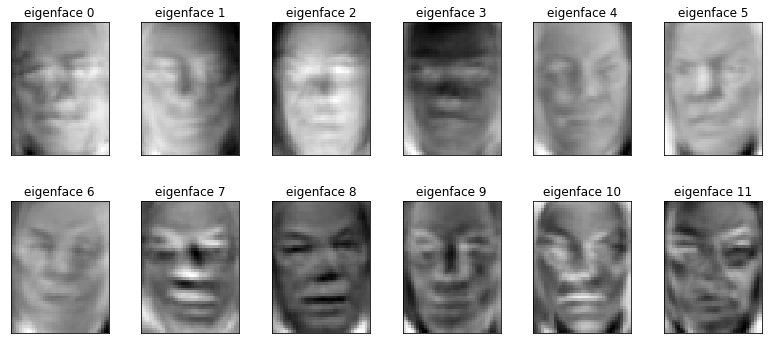

In [8]:
# Solution
n_components = 15
X = lfw_colin['images'].reshape(n_samples, h*w)
Z, P = pca(X, n_pc=n_components)
eigenfaces = P.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)